To do

Check Time Series data

Give a 2 page report to Sahameh about visualisation and indicate the data which has any problems, which is in consistant with the data from other dates
Planting date for 2018 is given in master thesis
Planting date for 2019 is May 05
Planting date for 2020 and remaining data will be given by Sahameh in the week starrting from 16th November

A lot of variations in MAT data, i.e. days to maturation.
Some have number of days while others have dates




Must do normalisation of data before training

Next step is Global Mix modelling
Sahameh will share a paper from 2020 about using hyper spectral imaging, which will be basis of Mix Modelling

In [1]:
# Add Planting date

# Deep Learning to predict Wheat Yield

In [2]:
import os
import pandas as pd
import numpy as np

# Define the directory with data files

path = r'C:\Users\fahad\Documents\Master Thesis\Phenotyping\Data\All'
path = path.replace("\\", "/") + '/'

In [3]:
list_dir = os.listdir(path)
list_dir

['Graminor_2018_complete.xlsx',
 'Masbasis_2017.xlsx',
 'Masbasis_2018_yp.xlsx',
 'Robot_2017.xlsx',
 'Robot_2018_YP.xlsx',
 'Yield missing']

In [4]:
# Get the name of the variable as string

import inspect

def retrieve_name(var):
        """
        Gets the name of var. Does it from the out most frame inner-wards.
        :param var: variable to get name from.
        :return: string
        """
        for fi in reversed(inspect.stack()):
            names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is var]
            if len(names) > 0:
                return names[0]


## Fixing 2019 data for missing yield

In [5]:
path2019 = path + '\Yield missing\\'
files_2019 = os.listdir(path2019)

In [6]:
list_2019 = []

for i, name in enumerate(files_2019):
    str = name[:-5]
    locals()[str] = name
    # print(locals()[str])
    list_2019.append(name)
list_2019

['Graminor_2019_050719.xlsx',
 'Graminor_2019_060619.xlsx',
 'Graminor_2019_070819_2.xlsx',
 'Graminor_2019_110619.xlsx',
 'Graminor_2019_150719.xlsx',
 'Graminor_2019_150819.xlsx',
 'Graminor_2019_220719_corrected.xlsx',
 'Graminor_2019_250719.xlsx',
 'Graminor_2019_280619_corrected.xlsx',
 'Graminor_2019_east_020719.xlsx',
 'Graminor_2019_east_050819.xlsx',
 'Graminor_2019_east_110719.xlsx',
 'Graminor_2019_west_020719.xlsx',
 'Graminor_2019_west_050819.xlsx',
 'Graminor_2019_west_250619_correct.xlsx',
 'Graminor_field_data_2019.xlsx']

In [7]:
from IPython.display import display, HTML

#Importing the data from csv/excel files to dataframes as listed in the df_str_list_19 list

df_str_list_19 = []

for filename in list_2019[:-1]:
#     print(locals()[filename])
    new_df = retrieve_name(filename) + '_df'
    if filename[-3:] == 'csv':
        locals()[new_df] = pd.read_csv(path2019 + filename,
                                       delimiter=';',
                                       encoding="ISO-8859-1")
        df_str_list_19.append(new_df)
        # Encoding has been defined to avoid UnicodeDecodeError while reading the csv
#         display(locals()[new_df].head(10))    # Print the df in pretty format
    elif filename[-4:] == 'xlsx':
        locals()[new_df] = pd.ExcelFile(path2019 + filename)
        if len(locals()[new_df].sheet_names) == 1:
            locals()[new_df] = pd.read_excel(path2019 + filename)
            df_str_list_19.append(new_df)
        elif len(locals()[new_df].sheet_names) > 1:
            for i in locals()[new_df].sheet_names:
                # Replacing '.' and '-' in the sheet file name to '_'
                k = i.replace('.', '_')
                k = k.replace('-', '_')
                new_sheet_df = filename[:-5] + '_' + k + '_df'
                locals()[new_sheet_df] = pd.read_excel(path2019 + filename, sheet_name = i)
                df_str_list_19.append(new_sheet_df)

#         display(locals()[new_df].head(10))    # Print the df in pretty format

# print(*df_str_list_19, sep = "\n")
print('Imported data for 2017 & 2018')

Imported data for 2017 & 2018


### Importing grain yield for 2019

In [8]:
list_2019[-1]

'Graminor_field_data_2019.xlsx'

In [9]:
yield_2019 = pd.ExcelFile(path2019 + list_2019[-1])
yield_2019.sheet_names

['Staur-kart', 'Staur-res.', 'Vollebekk-kart', 'Vollebekk-res.']

In [10]:
yield_sheet = yield_2019.sheet_names[-1]
yield_2019_data_df = pd.read_excel(path2019 + list_2019[-1], sheet_name =yield_sheet)
yield_2019_df = yield_2019_data_df.iloc[:,[2,13]]

# Renaming columns headers to standard names for vlookup in the next step
yield_2019_df.columns = ['id', 'grain_yield']
yield_2019_df.head(2)

,id,grain_yield
0,plot,kg/daa
1,101,499.624


### Merging grain yield to the datasets

In [11]:
# Applying "Vlookup" in pandas

for data_file in df_str_list_19:
    locals()[data_file] = locals()[data_file].merge(yield_2019_df, on='id')
#     print(locals()[data_file].head())

The grain yield data has been added to all the datasets

## Importing data from 2018 and 2017

In [12]:
data_file_list = []

for i, name in enumerate(list_dir):
    str = name[:-5]
    locals()[str] = name
#     print(locals()[str])
    data_file_list.append(name)
data_file_list

['Graminor_2018_complete.xlsx',
 'Masbasis_2017.xlsx',
 'Masbasis_2018_yp.xlsx',
 'Robot_2017.xlsx',
 'Robot_2018_YP.xlsx',
 'Yield missing']

In [13]:
from IPython.display import display, HTML

#Importing the data from csv/excel files to dataframes as listed in the data_file_list list

df_str_list = []

for filename in data_file_list[:-1]:
    new_df = retrieve_name(filename) + '_df'
    if filename[-3:] == 'csv':
        locals()[new_df] = pd.read_csv(path + filename,
                                       delimiter=';',
                                       encoding="ISO-8859-1")
        df_str_list.append(new_df)
        # Encoding has been defined to avoid UnicodeDecodeError while reading the csv
#         display(locals()[new_df].head(10))    # Print the df in pretty format
    elif filename[-4:] == 'xlsx':
        locals()[new_df] = pd.ExcelFile(path + filename)
        if len(locals()[new_df].sheet_names) == 1:
            locals()[new_df] = pd.read_excel(path + filename)
            df_str_list.append(new_df)
        elif len(locals()[new_df].sheet_names) > 1:
            for i in locals()[new_df].sheet_names:
                # Replacing '.' and '-' in the sheet file name to '_'
                k = i.replace('.', '_')
                k = k.replace('-', '_')
                new_sheet_df = filename[:-5] + '_' + k + '_df'
                locals()[new_sheet_df] = pd.read_excel(path + filename, sheet_name = i)
                df_str_list.append(new_sheet_df)

#         display(locals()[new_df].head(10))    # Print the df in pretty format

# print(*df_str_list, sep = "\n")
print('Imported data for 2017 & 2018')

Imported data for 2017 & 2018


In [14]:
df_str_list_all = df_str_list + df_str_list_19
print('Combined list of dataframes for 2017, 2018, 2019')
# df_str_list_all

Combined list of dataframes for 2017, 2018, 2019


In [15]:
# Replacing/removing '_' in column headings from all dataframes

for df in df_str_list_all:
    locals()[df].columns = locals()[df].columns.str.replace('_', '')
# df_str_list_all

In [16]:
# # Checking the number of columns/features in each dataset

# for df in df_str_list_all:
#     temp_col_list = locals()[df].columns.tolist()
#     print(df, len(temp_col_list))

In [17]:
# Rename columns to standard names in all dataframes from 2017 and 2018

sub_string_list = [
    'bluemed', 'greenmed', 'ndvimed', 'nirmed', 'redmed', 'rededgemed', 'mtci',
    'MAT', 'Yield', 'evi', 'HarvestYield'
]
new_names_list = [
    'blue_median', 'green_median', 'ndvi_median', 'nir_median', 'red_median',
    'red_edge_median', 'mtci_values', 'days_to_maturation', 'grain_yield',
    'evi_values', 'harvest_yield'
]

for df in df_str_list:
    temp_col_list = locals()[df].columns.tolist()
    for k, substring in enumerate(sub_string_list):
        # Replacing the first element in sub_string_list with respective element in 
        # new_names_list, if present
        replace_location = [i for i, s in enumerate(temp_col_list) if substring in s]
        if len(replace_location) > 0:
            new_name = new_names_list[k]
            temp_col_list[replace_location[0]] = new_name
    locals()[df].columns = temp_col_list
#     print(locals()[df].columns)

In [18]:
# Rename columns to standard names in all dataframes from 2019

sub_string_list = [
    'Bluemedia', 'bluemedia', 'Bluemed1', 'Bluemed2', 'Greenmedi', 'Greenme2',
    'Greenme4', 'NDVImedia', 'NDVImed1', 'NDVImed2', 'NIRmedian', 'NIRmedi1',
    'NIRmedi2', 'Redmedian', 'redmedian', 'Redmedi1', 'redmedi1', 'Redmedi2',
    'RedEdge1', 'redEdge1', 'RedEdge3', 'redEdge3', 'RedEdge6', 'MTCImed1',
    'MTCImed2', 'MTCImedia', 'MAT', 'grainyield', 'EVImedian', 'EVImedi1',
    'EVImedi2', 'HarvestYield'
]
new_names_list = [
    'blue_median', 'blue_median', 'blue_median', 'blue_median', 'green_median',
    'green_median', 'green_median', 'ndvi_median', 'ndvi_median',
    'ndvi_median', 'nir_median', 'nir_median', 'nir_median', 'red_median',
    'red_median', 'red_median', 'red_median', 'red_median', 'red_edge_median',
    'red_edge_median', 'red_edge_median', 'red_edge_median', 'red_edge_median',
    'mtci_values', 'mtci_values', 'mtci_values', 'days_to_maturation',
    'grain_yield', 'evi_values', 'evi_values', 'evi_values', 'harvest_yield'
]

for df in df_str_list_19:
    temp_col_list = locals()[df].columns.tolist()
    for k, substring in enumerate(sub_string_list):
        # Replacing the first element in sub_string_list with respective element in 
        # new_names_list, if present
        replace_location = [i for i, s in enumerate(temp_col_list) if substring in s]
        if len(replace_location) > 0:
            new_name = new_names_list[k]
            temp_col_list[replace_location[0]] = new_name
    locals()[df].columns = temp_col_list
#     print(locals()[df].columns)

In [19]:
# Create a list of columns for all dataframes in df_str_list_all which have specific text in their name

lists_of_median_cols = []

for df in df_str_list_all:
    list_of_columns = df+'_median_columns'
    locals()[list_of_columns] = []
    for strg in locals()[df].columns.tolist():
        if strg.find('_median') != -1 or strg.find('mtci') != -1 or strg.find('evi') != -1 or strg=='age' != -1 or strg.find('grain_yield') != -1:
            locals()[list_of_columns].append(strg)
    locals()[list_of_columns].sort()
    
    # Removing blue values for plotting the rest
#     while 'blue_median' in locals()[list_of_columns]: locals()[list_of_columns].remove('blue_median')
#     while 'evi_values' in locals()[list_of_columns]: locals()[list_of_columns].remove('evi_values')

#     # Append GrainYield to the end of the all lists
#     locals()[list_of_columns].append('grain_yield')
    lists_of_median_cols.append(list_of_columns)
    
#     print('\n', list_of_columns,locals() [df].shape, *locals()[list_of_columns], sep='\n')
#     print(df, ': # of cols = ', len(locals()[list_of_columns]))

In [20]:
lists_of_median_cols

['Graminor_2018_complete_26_06_18_df_median_columns',
 'Graminor_2018_complete_02_07_18_df_median_columns',
 'Graminor_2018_complete_19_07_18_df_median_columns',
 'Masbasis_2017_14_07_17_df_median_columns',
 'Masbasis_2017_17_07_17_df_median_columns',
 'Masbasis_2017_20_07_17_df_median_columns',
 'Masbasis_2017_01_08_17_df_median_columns',
 'Masbasis_2018_yp_13_07_18_df_median_columns',
 'Masbasis_2018_yp_26_07_18_df_median_columns',
 'Robot_2017_14_06_17_df_median_columns',
 'Robot_2017_19_06_17_df_median_columns',
 'Robot_2017_29_06_17_df_median_columns',
 'Robot_2017_03_07_17_df_median_columns',
 'Robot_2017_14_07_17_df_median_columns',
 'Robot_2017_17_07_17_df_median_columns',
 'Robot_2017_14_08_17_df_median_columns',
 'Robot_2018_YP_02_07_18_df_median_columns',
 'Robot_2018_YP_smallfield05_07_18_df_median_columns',
 'Robot_2018_YP_smallfield11_07_18_df_median_columns',
 'Robot_2018_YP_smallfield19_07_18_df_median_columns',
 'Robot_2018_YP_smallfield24_07_18_df_median_columns',
 'G

In [21]:
final_datasets = []
for i in lists_of_median_cols:
    if len(locals()[i]) == 10:
#         print(i, len(set(locals()[i])))
#         print(locals()[i])
        final_datasets.append(i[:-15])
# final_datasets
print(len(final_datasets), 'datasets selected with 9 features and one target variable each')

22 datasets selected with 9 features and one target variable each


In [25]:
smaples = []
for i in final_datasets:
    print(locals()[i].shape[0])
#     print(i)
#         final_datasets.append(i[:-15])


599
599
599
528
528
96
96
96
96
96
626
625
625
625
625
625
625
325
325
325
300
300


In [22]:
final_datasets

['Graminor_2018_complete_26_06_18_df',
 'Graminor_2018_complete_02_07_18_df',
 'Graminor_2018_complete_19_07_18_df',
 'Masbasis_2018_yp_13_07_18_df',
 'Masbasis_2018_yp_26_07_18_df',
 'Robot_2018_YP_02_07_18_df',
 'Robot_2018_YP_smallfield05_07_18_df',
 'Robot_2018_YP_smallfield11_07_18_df',
 'Robot_2018_YP_smallfield19_07_18_df',
 'Robot_2018_YP_smallfield24_07_18_df',
 'Graminor_2019_050719_df',
 'Graminor_2019_060619_df',
 'Graminor_2019_070819_2_df',
 'Graminor_2019_110619_df',
 'Graminor_2019_150719_df',
 'Graminor_2019_150819_df',
 'Graminor_2019_280619_corrected_df',
 'Graminor_2019_east_020719_df',
 'Graminor_2019_east_050819_df',
 'Graminor_2019_east_110719_df',
 'Graminor_2019_west_050819_df',
 'Graminor_2019_west_250619_correct_df']

In [23]:
# for i in lists_of_median_cols:
#     print(len(locals()[i]))
lists_of_median_cols

['Graminor_2018_complete_26_06_18_df_median_columns',
 'Graminor_2018_complete_02_07_18_df_median_columns',
 'Graminor_2018_complete_19_07_18_df_median_columns',
 'Masbasis_2017_14_07_17_df_median_columns',
 'Masbasis_2017_17_07_17_df_median_columns',
 'Masbasis_2017_20_07_17_df_median_columns',
 'Masbasis_2017_01_08_17_df_median_columns',
 'Masbasis_2018_yp_13_07_18_df_median_columns',
 'Masbasis_2018_yp_26_07_18_df_median_columns',
 'Robot_2017_14_06_17_df_median_columns',
 'Robot_2017_19_06_17_df_median_columns',
 'Robot_2017_29_06_17_df_median_columns',
 'Robot_2017_03_07_17_df_median_columns',
 'Robot_2017_14_07_17_df_median_columns',
 'Robot_2017_17_07_17_df_median_columns',
 'Robot_2017_14_08_17_df_median_columns',
 'Robot_2018_YP_02_07_18_df_median_columns',
 'Robot_2018_YP_smallfield05_07_18_df_median_columns',
 'Robot_2018_YP_smallfield11_07_18_df_median_columns',
 'Robot_2018_YP_smallfield19_07_18_df_median_columns',
 'Robot_2018_YP_smallfield24_07_18_df_median_columns',
 'G

In [24]:
# list_std_col_names = ['blue_median', 'green_median','ndvi_median','nir_median','red_median','red_edge_median','mtci_values','days_to_maturation','grain_yield', 'evi_values', 'harvest_yield']

list_std_col_names = ['blue_median','green_median','red_median','red_edge_median','ndvi_median','nir_median','mtci_values', 'evi_values', 'age', 'grain_yield','days_to_maturation']
# 'evi_values','grain_yield','days_to_maturation'

blue_median


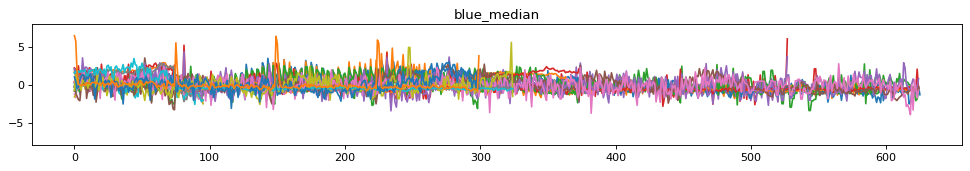

green_median


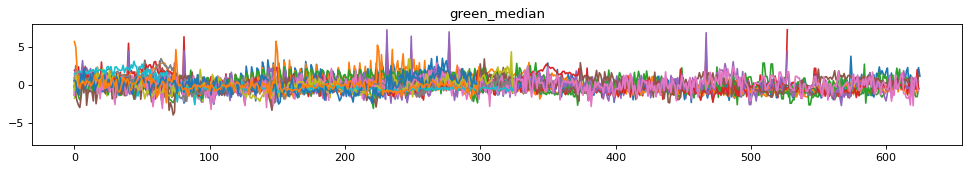

red_median


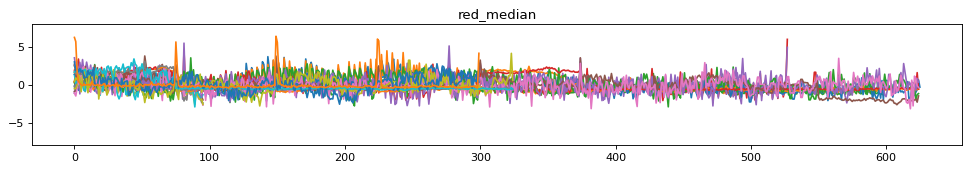

red_edge_median


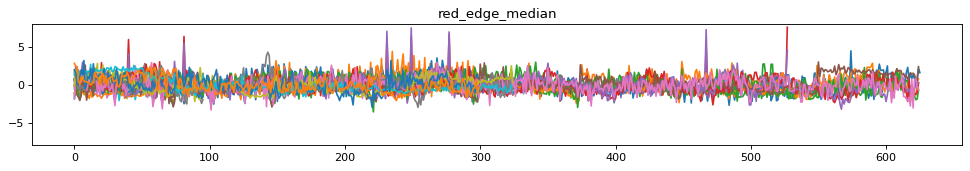

ndvi_median


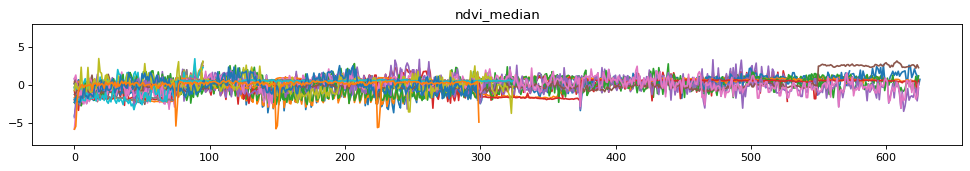

nir_median


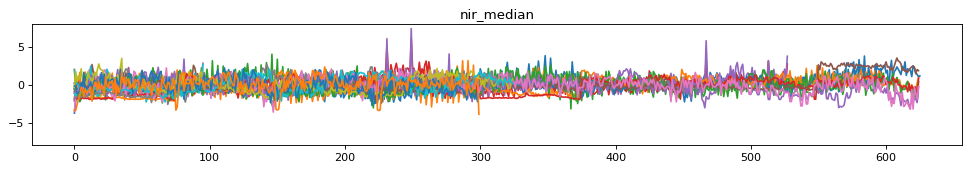

mtci_values


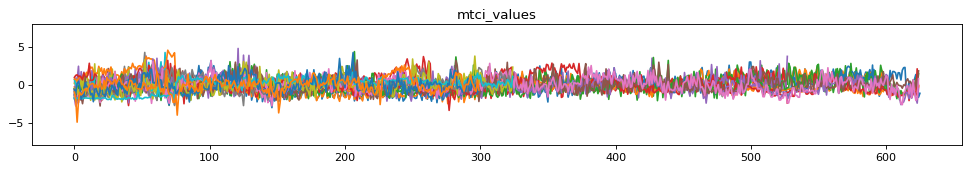

evi_values


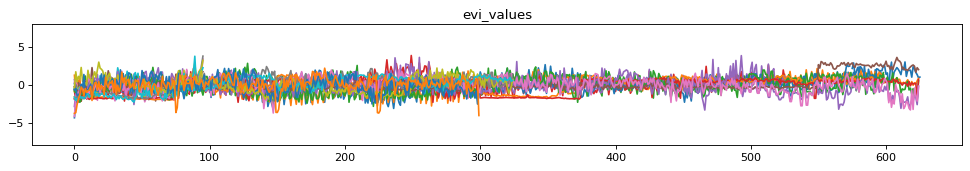

age


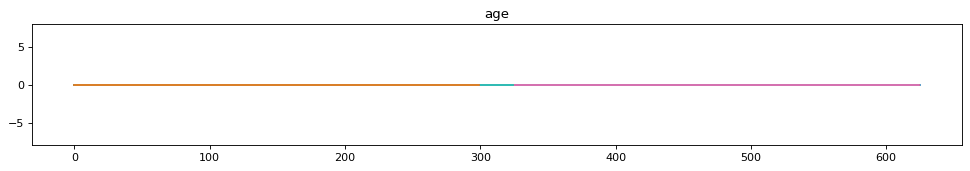

grain_yield


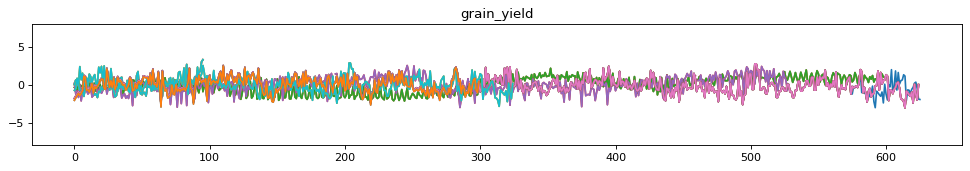

days_to_maturation


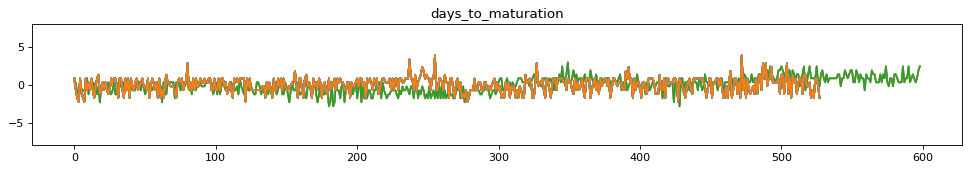

In [25]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
sc = StandardScaler()
for parameter in list_std_col_names:
    print(parameter)
    plt.figure(figsize=(15,2), dpi=80, facecolor='w', edgecolor='k')
    plt.title(parameter)
    plt.ylim(-8,8)
    for i , j in enumerate(final_datasets):
        if parameter in (locals()[j].columns.tolist()): # CHECK IF THE PARAMETER IS PRESENT IN THE COLUMNS
            norm_df = sc.fit_transform(locals()[j][[parameter]])
            df_norm = pd.DataFrame(norm_df, columns = [parameter])
        plt.plot(df_norm)
    plt.show()

#     fig = fig.get_figure()
#     fig.savefig('plots/' + title + '.pdf')
    
    
#     org_df = locals()[j][locals()[lists_of_median_cols[i]]]
#     # Function to plot data frame directly from Pandas
#     org_df.plot(title=j)


In [25]:
list_select_cols = ['green_median','red_median','red_edge_median','ndvi_median','nir_median','mtci_values']

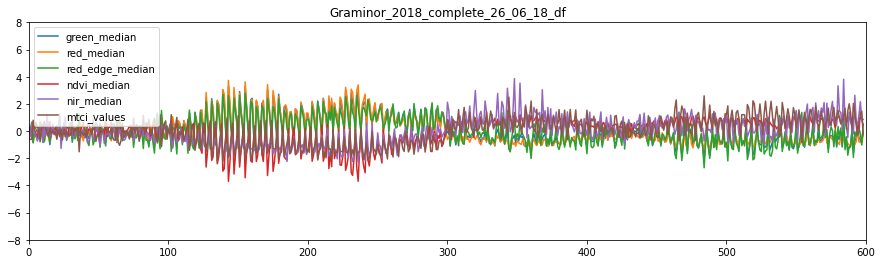

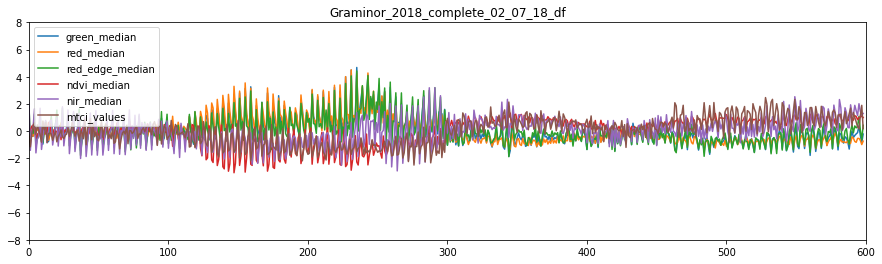

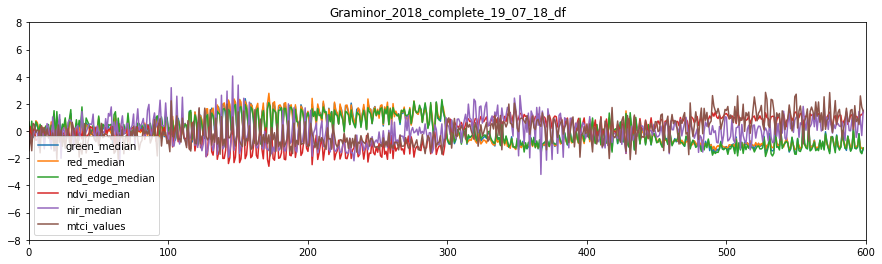

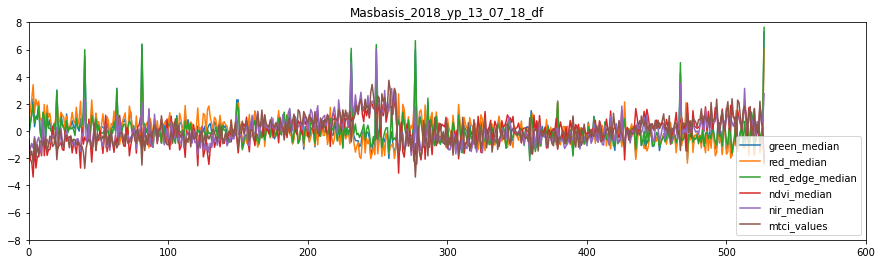

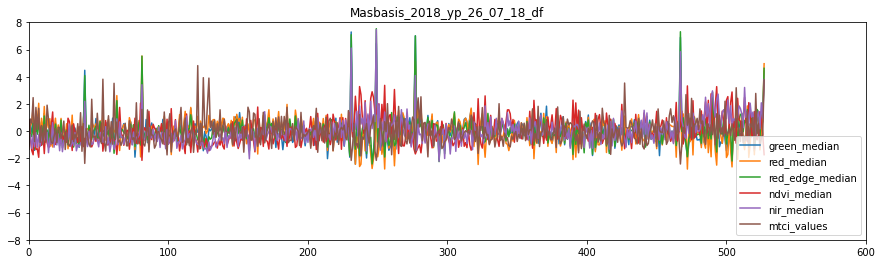

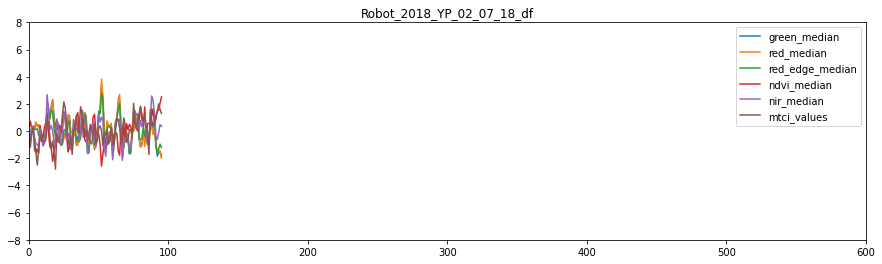

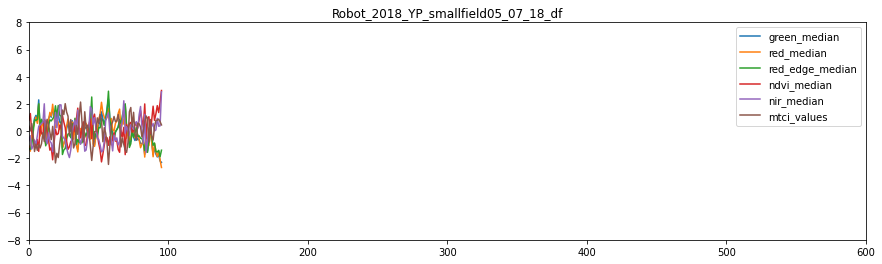

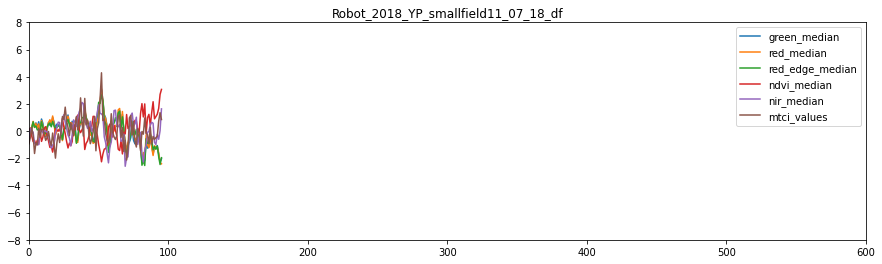

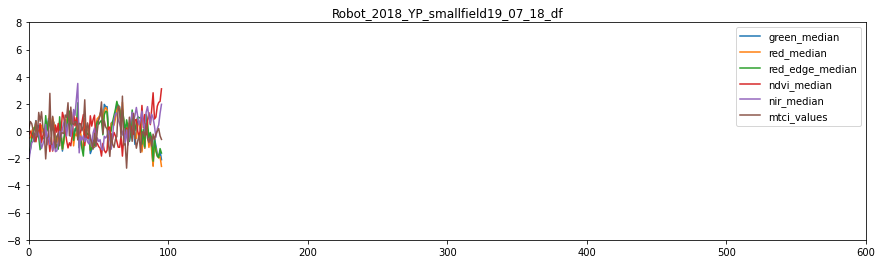

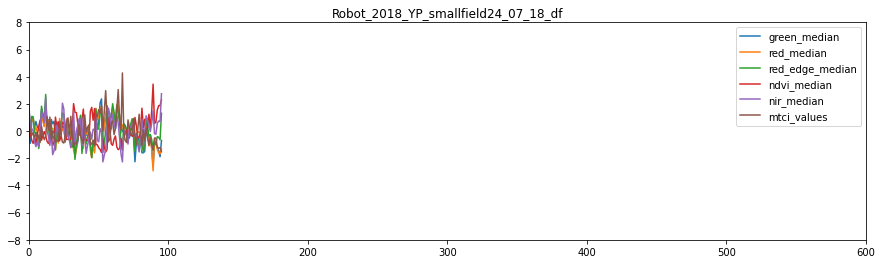

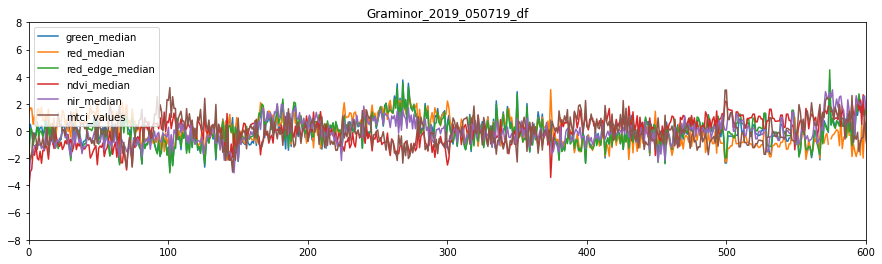

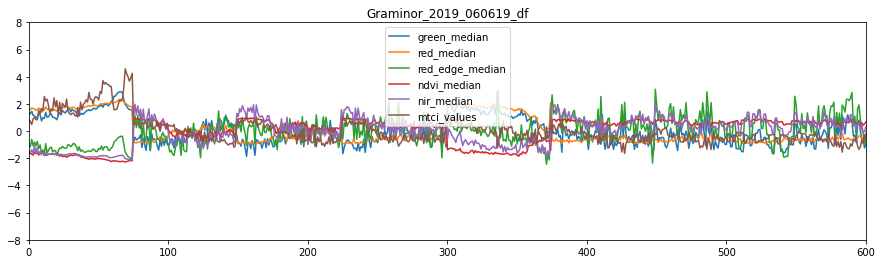

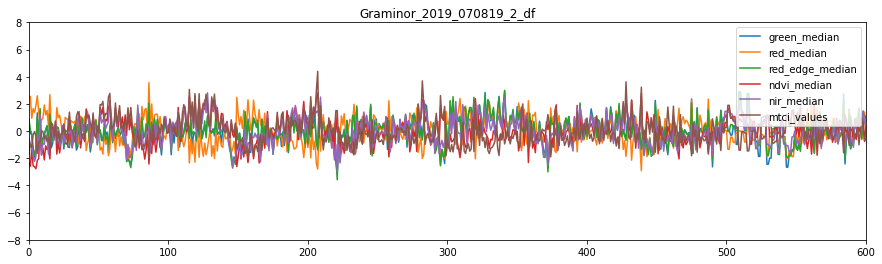

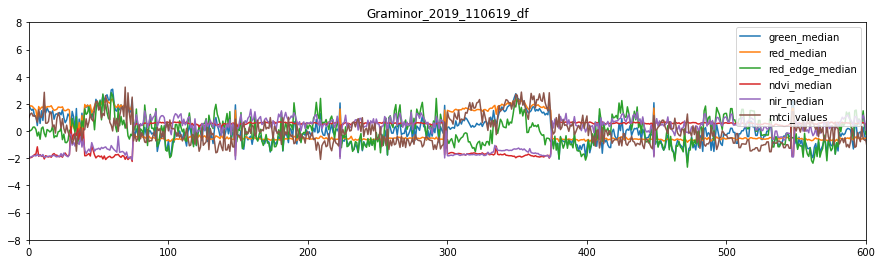

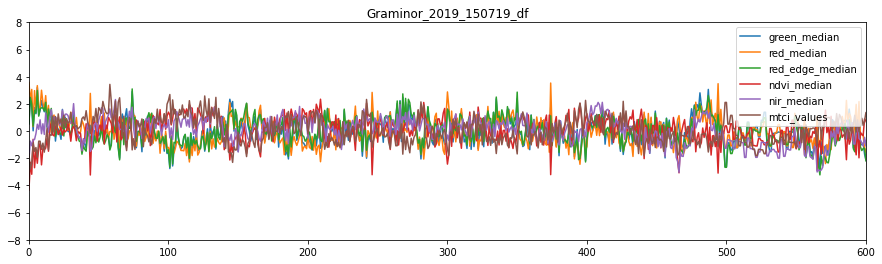

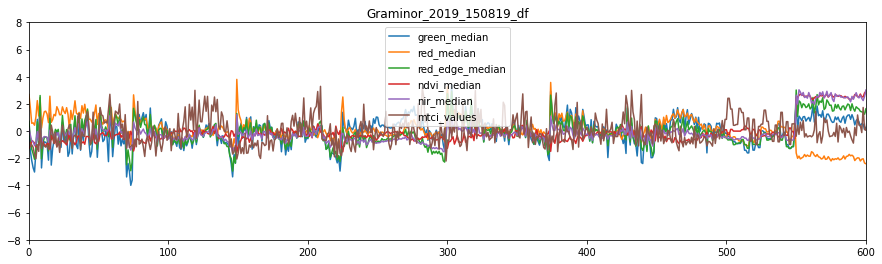

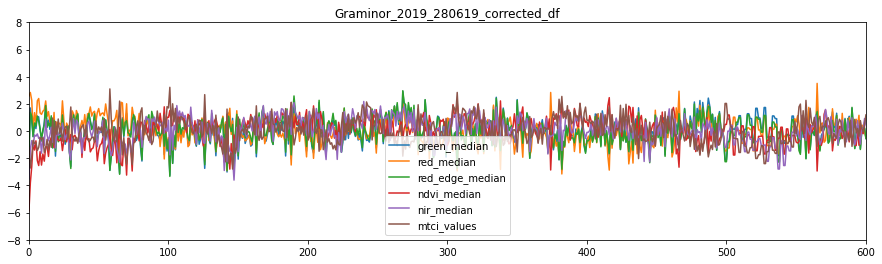

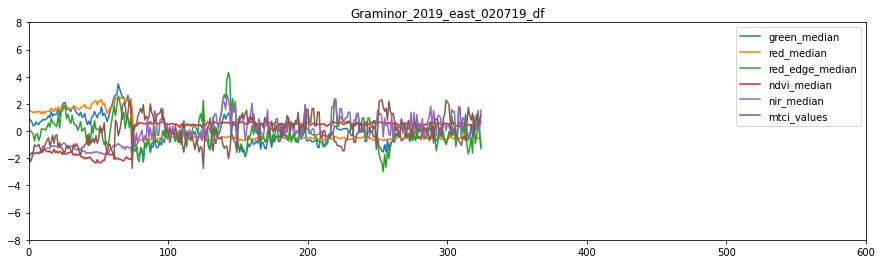

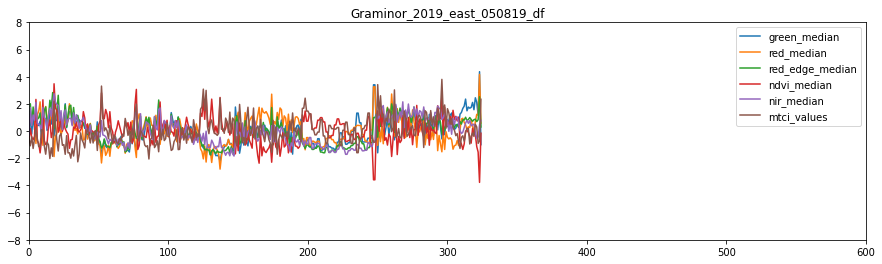

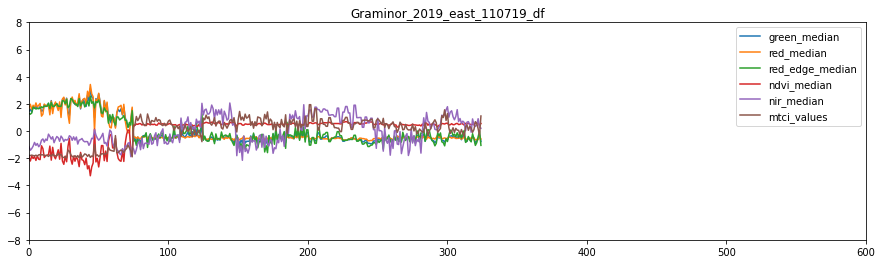

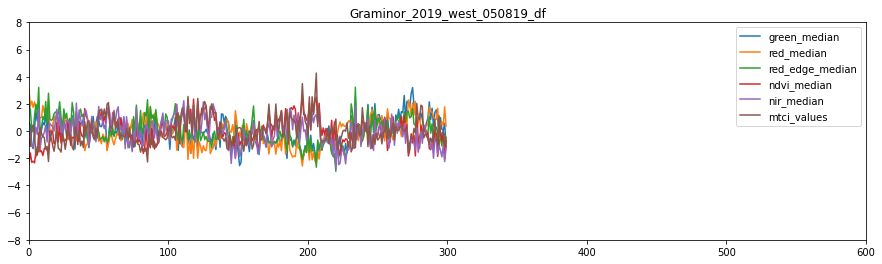

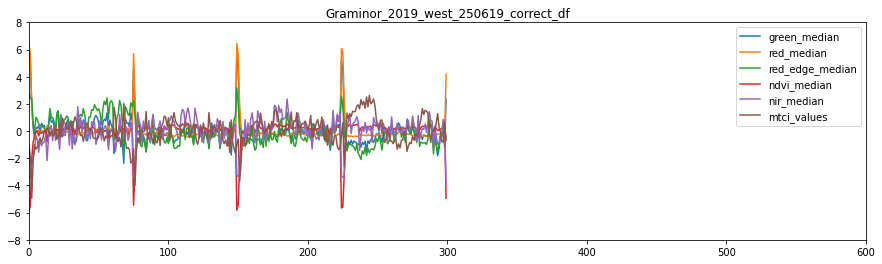

In [26]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
sc = StandardScaler()

for i , j in enumerate(final_datasets):
    norm_df = sc.fit_transform(locals()[j][list_select_cols])
    df_norm = pd.DataFrame(norm_df, columns = list_select_cols)
    df_norm.columns = list_select_cols
    df_norm.plot(title=j, ylim=(-8,8), xlim=(0,600), figsize=(15,4))
    plt.show()
#     org_df = locals()[j][locals()[lists_of_median_cols[i]]]
#     # Function to plot data frame directly from Pandas
#     org_df.plot(title=j)


In [28]:
final_columns = ['blue_median','green_median','red_median','red_edge_median','ndvi_median','nir_median','mtci_values', 'evi_values', 'age','grain_yield']

In [29]:
# Contaconating all dataframes into one for selecred final_columns

data_frames = []
for i in final_datasets:
    data_frames.append(locals()[i][final_columns])


ml_df = pd.concat(data_frames, ignore_index=True)

In [30]:
ml_df

,blue_median,green_median,red_median,red_edge_median,ndvi_median,nir_median,mtci_values,evi_values,age,grain_yield
0,0.034152,0.085196,0.045748,0.174878,0.883373,0.734195,4.331436,0.982070,48,431.699
1,0.036060,0.084995,0.045884,0.168578,0.876906,0.692295,4.268514,0.952200,48,409.089
2,0.036943,0.089985,0.045336,0.180775,0.888153,0.759447,4.272559,1.017603,48,372.861
3,0.030649,0.072090,0.036053,0.151221,0.906785,0.739433,5.107437,1.018870,48,528.219
4,0.037586,0.085404,0.050601,0.167592,0.869756,0.713398,4.665330,0.954982,48,462.506
...,...,...,...,...,...,...,...,...,...,...
9279,0.029813,0.115001,0.043041,0.235598,0.896805,0.778433,3.080369,1.906517,51,631.005
9280,0.028875,0.116390,0.041759,0.235039,0.903283,0.792686,2.926750,1.949479,51,641.486
9281,0.028778,0.119711,0.039235,0.255132,0.916507,0.884904,2.912663,2.181455,51,562.677
9282,0.026632,0.106301,0.036410,0.221450,0.926392,0.858537,3.239740,2.120530,51,547.552


In [31]:
#Count Nan values in any cell in all columns

counter=0
for d in final_columns:
    counter=0
    print(d)
    for x in ml_df[d]:
        if not pd.notna(x):
            
            counter+=1
    print(counter,'missing values in',d)

blue_median
0 missing values in blue_median
green_median
0 missing values in green_median
red_median
1 missing values in red_median
red_edge_median
0 missing values in red_edge_median
ndvi_median
1 missing values in ndvi_median
nir_median
0 missing values in nir_median
mtci_values
1 missing values in mtci_values
evi_values
1 missing values in evi_values
age
0 missing values in age
grain_yield
13 missing values in grain_yield


Looks like there are approx,maybe 14 rows with missing values

In [32]:
# Dropped rows with missing values

ml_df.dropna(axis=0, inplace=True)
ml_df.reset_index(inplace=True, drop=True)
ml_df

,blue_median,green_median,red_median,red_edge_median,ndvi_median,nir_median,mtci_values,evi_values,age,grain_yield
0,0.034152,0.085196,0.045748,0.174878,0.883373,0.734195,4.331436,0.982070,48,431.699
1,0.036060,0.084995,0.045884,0.168578,0.876906,0.692295,4.268514,0.952200,48,409.089
2,0.036943,0.089985,0.045336,0.180775,0.888153,0.759447,4.272559,1.017603,48,372.861
3,0.030649,0.072090,0.036053,0.151221,0.906785,0.739433,5.107437,1.018870,48,528.219
4,0.037586,0.085404,0.050601,0.167592,0.869756,0.713398,4.665330,0.954982,48,462.506
...,...,...,...,...,...,...,...,...,...,...
9265,0.029813,0.115001,0.043041,0.235598,0.896805,0.778433,3.080369,1.906517,51,631.005
9266,0.028875,0.116390,0.041759,0.235039,0.903283,0.792686,2.926750,1.949479,51,641.486
9267,0.028778,0.119711,0.039235,0.255132,0.916507,0.884904,2.912663,2.181455,51,562.677
9268,0.026632,0.106301,0.036410,0.221450,0.926392,0.858537,3.239740,2.120530,51,547.552


## Visualising features

blue_median


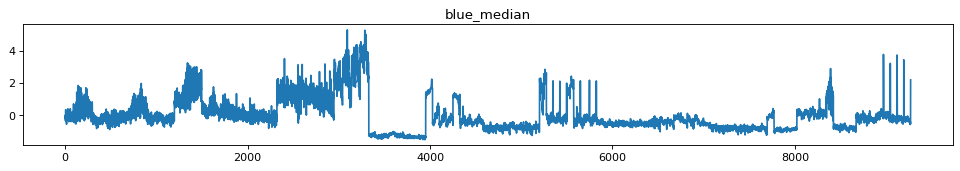

green_median


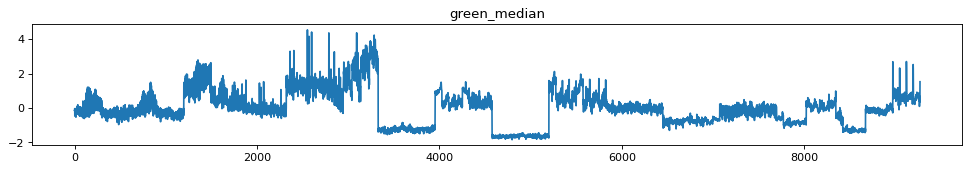

red_median


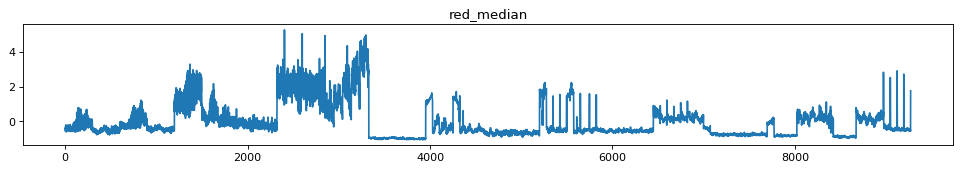

red_edge_median


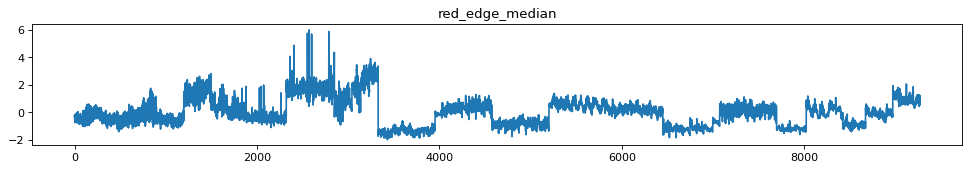

ndvi_median


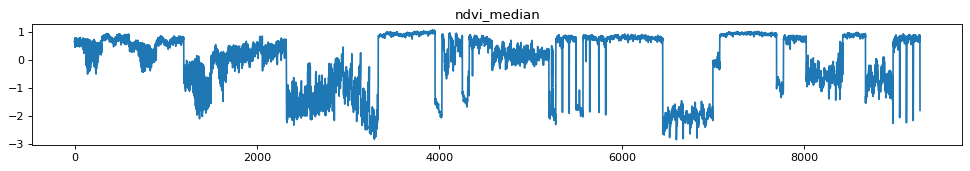

nir_median


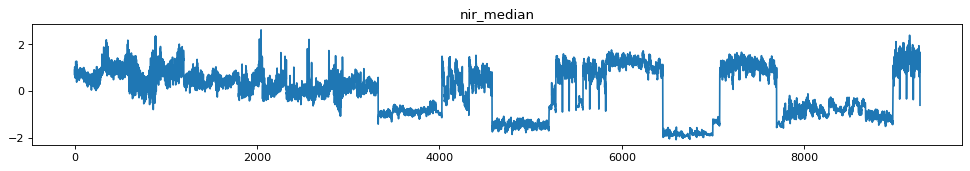

mtci_values


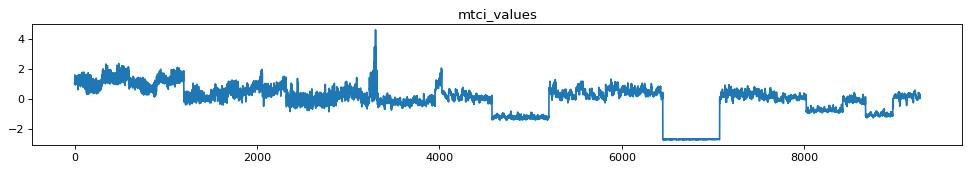

evi_values


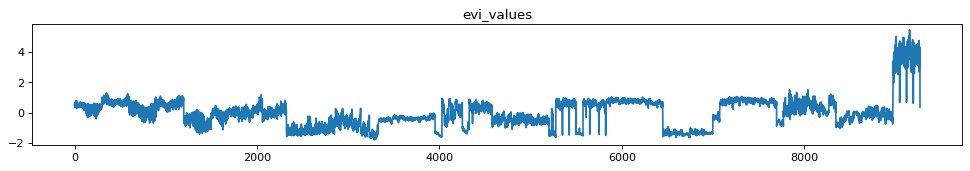

grain_yield


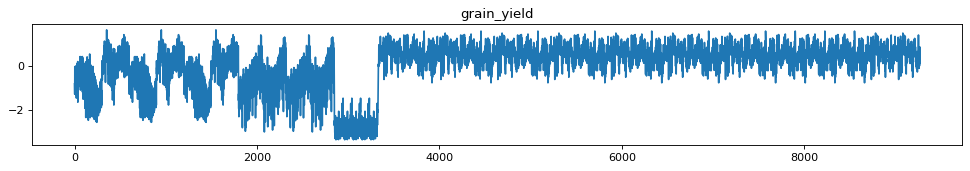

In [32]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

sc = StandardScaler()

for parameter in final_columns:
    print(parameter)
    plt.figure(figsize=(15,2), dpi=80, facecolor='w', edgecolor='k')
    plt.title(parameter)
#     plt.ylim(-8,8)
    
    if parameter in ml_df.columns.tolist(): # CHECK IF THE PARAMETER IS PRESENT IN THE COLUMNS
        norm_df = sc.fit_transform(ml_df[[parameter]])
        df_norm = pd.DataFrame(norm_df, columns = [parameter])
    plt.plot(df_norm)
    plt.show()

#     fig = fig.get_figure()
#     fig.savefig('plots/' + title + '.pdf')
    
    
#     org_df = locals()[j][locals()[lists_of_median_cols[i]]]
#     # Function to plot data frame directly from Pandas
#     org_df.plot(title=j)


## Standardizing data

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
ml_df_std = sc.fit_transform(ml_df[final_columns[:-1]])
ml_df_std = pd.DataFrame(ml_df_std, columns =final_columns[:-1] )

ml_df_std

,blue_median,green_median,red_median,red_edge_median,ndvi_median,nir_median,mtci_values,evi_values
0,-0.130457,-0.157766,-0.395402,-0.293135,0.646189,0.900287,1.056244,0.550446
1,-0.029143,-0.162631,-0.392904,-0.412502,0.609372,0.685036,1.011221,0.455895
2,0.017724,-0.041961,-0.402930,-0.181387,0.673402,1.030015,1.014115,0.662924
3,-0.316480,-0.474694,-0.572730,-0.741371,0.779473,0.927199,1.611503,0.666935
4,0.051910,-0.152734,-0.306641,-0.431167,0.568668,0.793447,1.295158,0.464703
...,...,...,...,...,...,...,...,...
9265,-0.360836,0.562950,-0.444914,0.857362,0.722656,1.127553,0.161057,3.476724
9266,-0.410676,0.596548,-0.468366,0.846763,0.759540,1.200775,0.051136,3.612715
9267,-0.415830,0.676855,-0.514521,1.227471,0.834824,1.674524,0.041057,4.347021
9268,-0.529777,0.352573,-0.566194,0.589286,0.891095,1.539072,0.275092,4.154168


### Adding the grain_yield data into the standardized dataframe

In [34]:
ml_df_std['grain_yield'] = ml_df['grain_yield'].values
ml_df_std

,blue_median,green_median,red_median,red_edge_median,ndvi_median,nir_median,mtci_values,evi_values,grain_yield
0,-0.130457,-0.157766,-0.395402,-0.293135,0.646189,0.900287,1.056244,0.550446,431.699
1,-0.029143,-0.162631,-0.392904,-0.412502,0.609372,0.685036,1.011221,0.455895,409.089
2,0.017724,-0.041961,-0.402930,-0.181387,0.673402,1.030015,1.014115,0.662924,372.861
3,-0.316480,-0.474694,-0.572730,-0.741371,0.779473,0.927199,1.611503,0.666935,528.219
4,0.051910,-0.152734,-0.306641,-0.431167,0.568668,0.793447,1.295158,0.464703,462.506
...,...,...,...,...,...,...,...,...,...
9265,-0.360836,0.562950,-0.444914,0.857362,0.722656,1.127553,0.161057,3.476724,631.005
9266,-0.410676,0.596548,-0.468366,0.846763,0.759540,1.200775,0.051136,3.612715,641.486
9267,-0.415830,0.676855,-0.514521,1.227471,0.834824,1.674524,0.041057,4.347021,562.677
9268,-0.529777,0.352573,-0.566194,0.589286,0.891095,1.539072,0.275092,4.154168,547.552


## Visualising complete data

blue_median


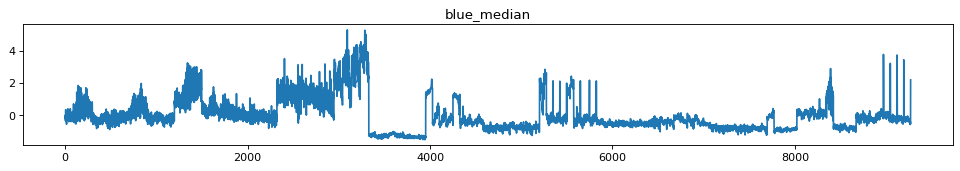

green_median


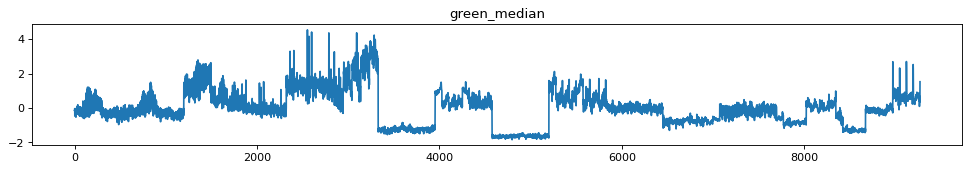

red_median


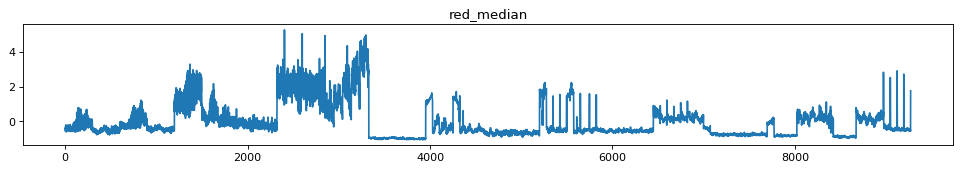

red_edge_median


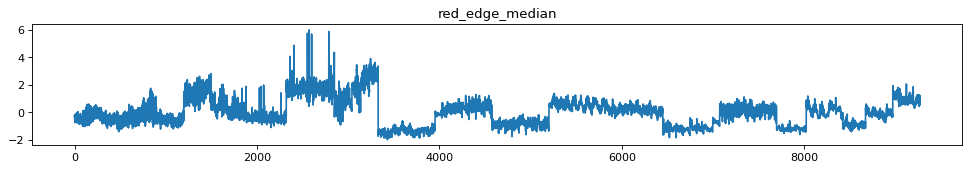

ndvi_median


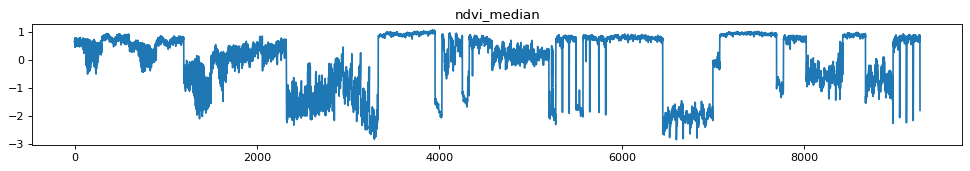

nir_median


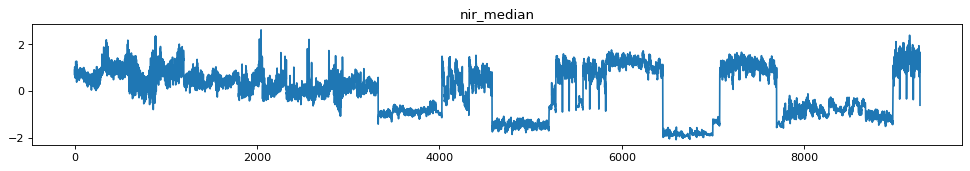

mtci_values


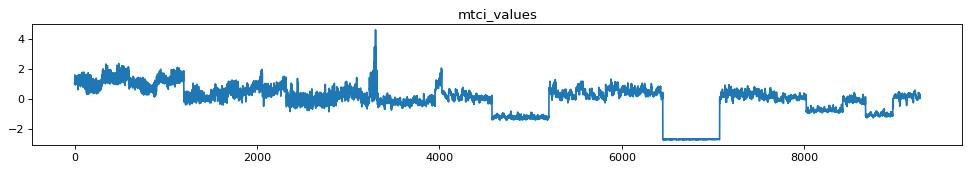

evi_values


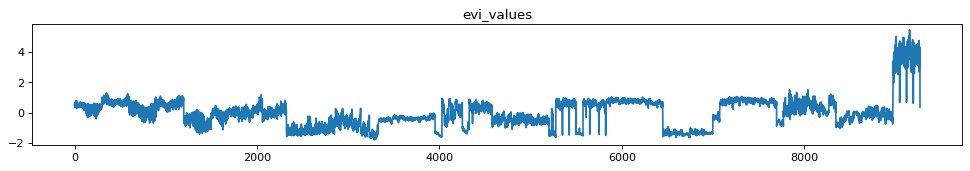

grain_yield


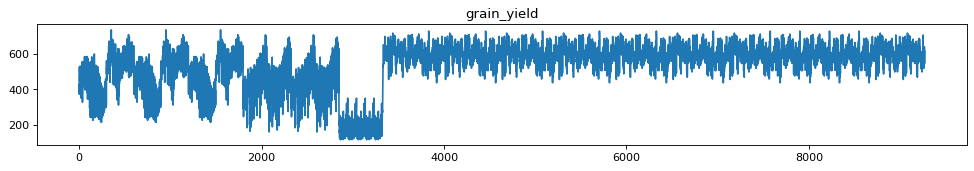

In [35]:
import matplotlib.pyplot as plt

for parameter in final_columns:
    print(parameter)
    plt.figure(figsize=(15,2), dpi=80, facecolor='w', edgecolor='k')
    plt.title(parameter)
    plt.plot(ml_df_std[parameter])
    plt.show()

#     fig = fig.get_figure()
#     fig.savefig('plots/' + title + '.pdf')
    
    
#     org_df = locals()[j][locals()[lists_of_median_cols[i]]]
#     # Function to plot data frame directly from Pandas
#     org_df.plot(title=j)


## Correlation Matrix

Correlation cannot be calculated if the grain_yield has not been transformed by standard scaler. The corr function automatically skips the grain_yield. To include that, the target has to be transformed.

In [36]:
ml_df['grain_yield'].shape

(9270,)

In [37]:
# Transforminf grain_yield

from sklearn.preprocessing import StandardScaler
import copy

sc = StandardScaler()
ml_df_std_yield = copy.copy(ml_df_std)
ml_df_std_yield.shape

ml_df_std_yield['grain_yield'] = sc.fit_transform(ml_df['grain_yield'].values.reshape(-1,1))
ml_df_std_yield

# # Inverse transform grain_yield
# sc.inverse_transform(ml_df_std_corrdf['grain_yield'])

,blue_median,green_median,red_median,red_edge_median,ndvi_median,nir_median,mtci_values,evi_values,grain_yield
0,-0.130457,-0.157766,-0.395402,-0.293135,0.646189,0.900287,1.056244,0.550446,-0.813373
1,-0.029143,-0.162631,-0.392904,-0.412502,0.609372,0.685036,1.011221,0.455895,-0.996932
2,0.017724,-0.041961,-0.402930,-0.181387,0.673402,1.030015,1.014115,0.662924,-1.291056
3,-0.316480,-0.474694,-0.572730,-0.741371,0.779473,0.927199,1.611503,0.666935,-0.029760
4,0.051910,-0.152734,-0.306641,-0.431167,0.568668,0.793447,1.295158,0.464703,-0.563261
...,...,...,...,...,...,...,...,...,...
9265,-0.360836,0.562950,-0.444914,0.857362,0.722656,1.127553,0.161057,3.476724,0.804715
9266,-0.410676,0.596548,-0.468366,0.846763,0.759540,1.200775,0.051136,3.612715,0.889809
9267,-0.415830,0.676855,-0.514521,1.227471,0.834824,1.674524,0.041057,4.347021,0.249988
9268,-0.529777,0.352573,-0.566194,0.589286,0.891095,1.539072,0.275092,4.154168,0.127194


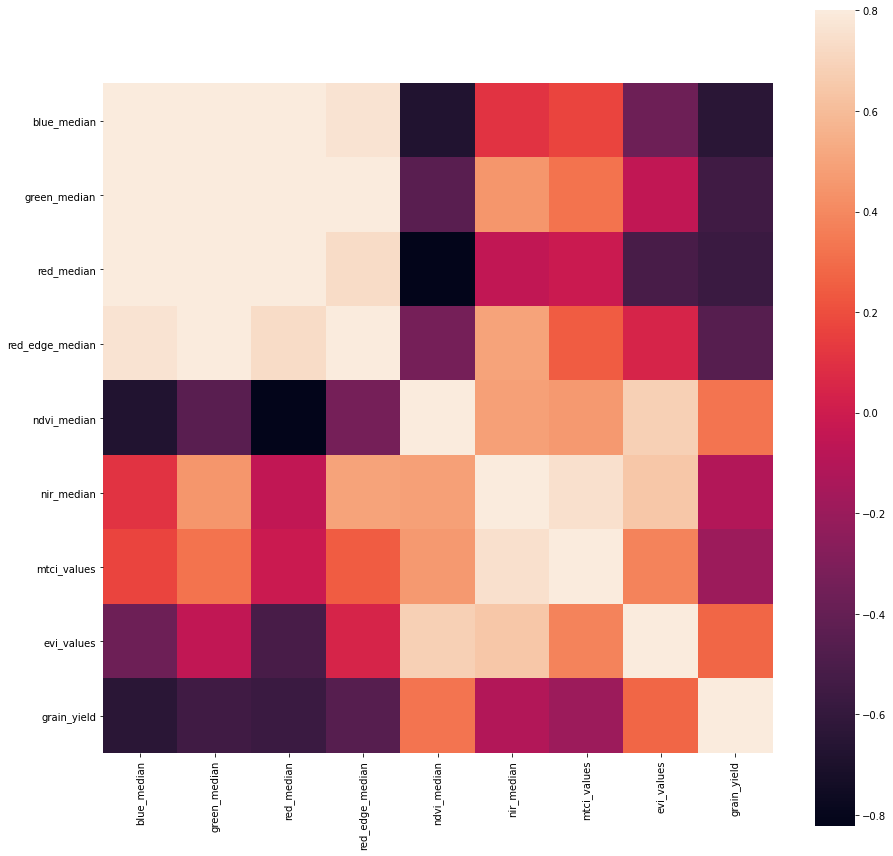

In [38]:
import seaborn as sns

C_mat = ml_df_std_yield.corr()
fig = plt.figure(figsize = (15,15))

sns.heatmap(C_mat, vmax = .8, square = True)
plt.show()

<AxesSubplot:>

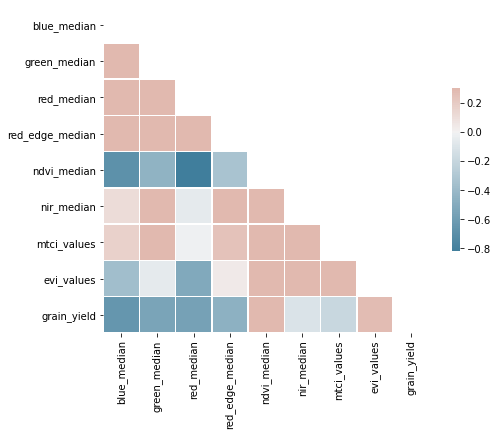

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = ml_df_std_yield.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Outliers Removal

USE scipy.stats.zscore() TO REMOVE OUTLIERS FROM A DATAFRAME
Call scipy.stats.zscore(a) with a as a DataFrame to get a NumPy array containing the z-score of each value in a. Call numpy.abs(x) with x as the previous result to convert each element in x to its absolute value. Use the syntax (array < 3).all(axis=1) with array as the previous result to create a boolean array. Filter the original DataFrame with this result.
Note that a value is removed if it is an outlier in its column, not necessarily the entire DataFrame.

In [ ]:
z_scores = stats.zscore(df)
calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

print(new_df)

## Exporting to CSV

In [33]:
ml_df.to_csv("ml_df.csv", index=False, header=True)

In [34]:
ml_df

,blue_median,green_median,red_median,red_edge_median,ndvi_median,nir_median,mtci_values,evi_values,age,grain_yield
0,0.034152,0.085196,0.045748,0.174878,0.883373,0.734195,4.331436,0.982070,48,431.699
1,0.036060,0.084995,0.045884,0.168578,0.876906,0.692295,4.268514,0.952200,48,409.089
2,0.036943,0.089985,0.045336,0.180775,0.888153,0.759447,4.272559,1.017603,48,372.861
3,0.030649,0.072090,0.036053,0.151221,0.906785,0.739433,5.107437,1.018870,48,528.219
4,0.037586,0.085404,0.050601,0.167592,0.869756,0.713398,4.665330,0.954982,48,462.506
...,...,...,...,...,...,...,...,...,...,...
9265,0.029813,0.115001,0.043041,0.235598,0.896805,0.778433,3.080369,1.906517,51,631.005
9266,0.028875,0.116390,0.041759,0.235039,0.903283,0.792686,2.926750,1.949479,51,641.486
9267,0.028778,0.119711,0.039235,0.255132,0.916507,0.884904,2.912663,2.181455,51,562.677
9268,0.026632,0.106301,0.036410,0.221450,0.926392,0.858537,3.239740,2.120530,51,547.552
